In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
import joblib 
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
path = r'../dataset/dataset_v2.csv'    
df = pd.read_csv(path, parse_dates=['Date'])
df = df.sort_values("Date")
df = df.reset_index(drop=True)
df.head()

,Date,Close,Volume,CPIAUCSL,FEDFUNDS,sp500,usd_index,Open_prev,High_prev,Low_prev
0,2000-08-31,278.299988,0.0,172.7,6.50,1517.680054,112.599998,273.899994,273.899994,273.899994
1,2000-09-01,277.000000,0.0,173.6,6.52,1520.770020,111.419998,274.799988,278.299988,274.799988
2,2000-09-05,275.799988,2.0,173.6,6.52,1507.079956,112.410004,277.000000,277.000000,277.000000
3,2000-09-06,274.200012,0.0,173.6,6.52,1492.250000,114.120003,275.799988,275.799988,275.799988
4,2000-09-07,274.000000,125.0,173.6,6.52,1502.510010,113.650002,274.200012,274.200012,274.200012


2. Feature engineering 

In [8]:
for i in range (2,11): 
    df[f'Close_{i}th_day'] = df['Close'].shift(i)

df.head()

,Date,Close,Volume,CPIAUCSL,FEDFUNDS,sp500,usd_index,Open_prev,High_prev,Low_prev,Close_2th_day,Close_3th_day,Close_4th_day,Close_5th_day,Close_6th_day,Close_7th_day,Close_8th_day,Close_9th_day,Close_10th_day
0,2000-08-31,278.299988,0.0,172.7,6.50,1517.680054,112.599998,273.899994,273.899994,273.899994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-09-01,277.000000,0.0,173.6,6.52,1520.770020,111.419998,274.799988,278.299988,274.799988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-09-05,275.799988,2.0,173.6,6.52,1507.079956,112.410004,277.000000,277.000000,277.000000,278.299988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-09-06,274.200012,0.0,173.6,6.52,1492.250000,114.120003,275.799988,275.799988,275.799988,277.000000,278.299988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-07,274.000000,125.0,173.6,6.52,1502.510010,113.650002,274.200012,274.200012,274.200012,275.799988,277.000000,278.299988,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.dropna()

df.head()

,Date,Close,Volume,CPIAUCSL,FEDFUNDS,sp500,usd_index,Open_prev,High_prev,Low_prev,Close_2th_day,Close_3th_day,Close_4th_day,Close_5th_day,Close_6th_day,Close_7th_day,Close_8th_day,Close_9th_day,Close_10th_day
10,2000-09-15,272.299988,0.0,173.6,6.52,1465.810059,115.940002,272.399994,272.399994,272.399994,272.799988,272.899994,273.100006,273.299988,274.000000,274.200012,275.799988,277.000000,278.299988
11,2000-09-18,271.399994,0.0,173.6,6.52,1444.510010,116.000000,272.299988,272.299988,272.299988,272.399994,272.799988,272.899994,273.100006,273.299988,274.000000,274.200012,275.799988,277.000000
12,2000-09-19,271.899994,0.0,173.6,6.52,1459.900024,116.110001,271.399994,271.399994,271.399994,272.299988,272.399994,272.799988,272.899994,273.100006,273.299988,274.000000,274.200012,275.799988
13,2000-09-20,269.000000,0.0,173.6,6.52,1451.339966,116.410004,271.899994,271.899994,271.899994,271.399994,272.299988,272.399994,272.799988,272.899994,273.100006,273.299988,274.000000,274.200012
14,2000-09-21,270.299988,0.0,173.6,6.52,1449.050049,115.269997,269.000000,269.000000,269.000000,271.899994,271.399994,272.299988,272.399994,272.799988,272.899994,273.100006,273.299988,274.000000


In [10]:
pct_change_lags = [1, 3, 5, 7, 14, 30]

for lag in pct_change_lags:
    df[f'Close_pct_change{lag}'] = df['Close'].pct_change(periods=lag) * 100

df.head()

,Date,Close,Volume,CPIAUCSL,FEDFUNDS,sp500,usd_index,Open_prev,High_prev,Low_prev,...,Close_7th_day,Close_8th_day,Close_9th_day,Close_10th_day,Close_pct_change1,Close_pct_change3,Close_pct_change5,Close_pct_change7,Close_pct_change14,Close_pct_change30
10,2000-09-15,272.299988,0.0,173.6,6.52,1465.810059,115.940002,272.399994,272.399994,272.399994,...,274.200012,275.799988,277.000000,278.299988,NaN,NaN,NaN,NaN,NaN,NaN
11,2000-09-18,271.399994,0.0,173.6,6.52,1444.510010,116.000000,272.299988,272.299988,272.299988,...,274.000000,274.200012,275.799988,277.000000,-0.330516,NaN,NaN,NaN,NaN,NaN
12,2000-09-19,271.899994,0.0,173.6,6.52,1459.900024,116.110001,271.399994,271.399994,271.399994,...,273.299988,274.000000,274.200012,275.799988,0.184230,NaN,NaN,NaN,NaN,NaN
13,2000-09-20,269.000000,0.0,173.6,6.52,1451.339966,116.410004,271.899994,271.899994,271.899994,...,273.100006,273.299988,274.000000,274.200012,-1.066566,-1.211894,NaN,NaN,NaN,NaN
14,2000-09-21,270.299988,0.0,173.6,6.52,1449.050049,115.269997,269.000000,269.000000,269.000000,...,272.899994,273.100006,273.299988,274.000000,0.483267,-0.405308,NaN,NaN,NaN,NaN


In [11]:
df = df.dropna()

df.head()

,Date,Close,Volume,CPIAUCSL,FEDFUNDS,sp500,usd_index,Open_prev,High_prev,Low_prev,...,Close_7th_day,Close_8th_day,Close_9th_day,Close_10th_day,Close_pct_change1,Close_pct_change3,Close_pct_change5,Close_pct_change7,Close_pct_change14,Close_pct_change30
40,2000-10-27,264.399994,1.0,173.9,6.51,1379.579956,117.389999,266.000000,267.000000,264.899994,...,270.299988,271.100006,271.500000,272.399994,-0.188750,-2.110334,-2.507381,-2.182758,-2.110334,-2.901210
41,2000-10-30,264.299988,2.0,173.9,6.51,1398.660034,117.250000,265.500000,265.500000,264.399994,...,270.100006,270.299988,271.100006,271.500000,-0.037824,-0.713758,-2.147360,-2.147360,-2.973571,-2.616067
42,2000-10-31,264.899994,0.0,173.9,6.51,1429.400024,116.650002,264.299988,264.299988,264.299988,...,271.200012,270.100006,270.299988,271.100006,0.227017,0.000000,-1.925217,-2.323015,-2.070243,-2.574476
43,2000-11-01,263.899994,0.0,174.2,6.51,1421.219971,115.559998,264.500000,265.000000,264.500000,...,270.100006,271.200012,270.100006,270.299988,-0.377501,-0.189107,-0.864019,-2.295451,-4.522431,-1.895913
44,2000-11-02,264.399994,0.0,174.2,6.51,1428.319946,115.610001,263.899994,263.899994,263.899994,...,270.100006,270.100006,271.200012,270.100006,0.189466,0.037838,-0.188750,-2.110334,-2.936858,-2.182758


4. Scaling the values

In [13]:
target = ['Close']
features = [col for col in df.columns if col not in ['Date', target]]

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

path = r'../scalers/scaler4.pkl'
joblib.dump(scaler, path)

['../scalers/scaler4.pkl']

In [14]:
df.head()

,Date,Close,Volume,CPIAUCSL,FEDFUNDS,sp500,usd_index,Open_prev,High_prev,Low_prev,...,Close_7th_day,Close_8th_day,Close_9th_day,Close_10th_day,Close_pct_change1,Close_pct_change3,Close_pct_change5,Close_pct_change7,Close_pct_change14,Close_pct_change30
40,2000-10-27,0.002928,0.000003,0.000000,1.0,0.128584,0.929191,0.003452,0.003375,0.003141,...,0.004816,0.005069,0.005196,0.005481,0.498601,0.396385,0.323000,0.341817,0.433844,0.371337
41,2000-10-30,0.002897,0.000005,0.000000,1.0,0.132074,0.926367,0.003295,0.002911,0.002982,...,0.004752,0.004816,0.005069,0.005196,0.506812,0.448725,0.333629,0.342783,0.410476,0.377622
42,2000-10-31,0.003086,0.000000,0.000000,1.0,0.137696,0.914263,0.002918,0.002539,0.002950,...,0.005101,0.004752,0.004816,0.005069,0.521220,0.475475,0.340187,0.337989,0.434929,0.378539
43,2000-11-01,0.002771,0.000000,0.002045,1.0,0.136200,0.892273,0.002981,0.002756,0.003014,...,0.004752,0.005101,0.004752,0.004816,0.488333,0.468388,0.371517,0.338741,0.368550,0.393496
44,2000-11-02,0.002928,0.000000,0.002045,1.0,0.137499,0.893282,0.002793,0.002415,0.002823,...,0.004752,0.004752,0.005101,0.004752,0.519177,0.476894,0.391454,0.343793,0.411470,0.387173


5. Model training 

In [16]:
X = df[features]
y = df[target]

split_index = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [19]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [20]:
y_pred = xgb.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score: -0.3747
Mean Squared Error: 0.0229


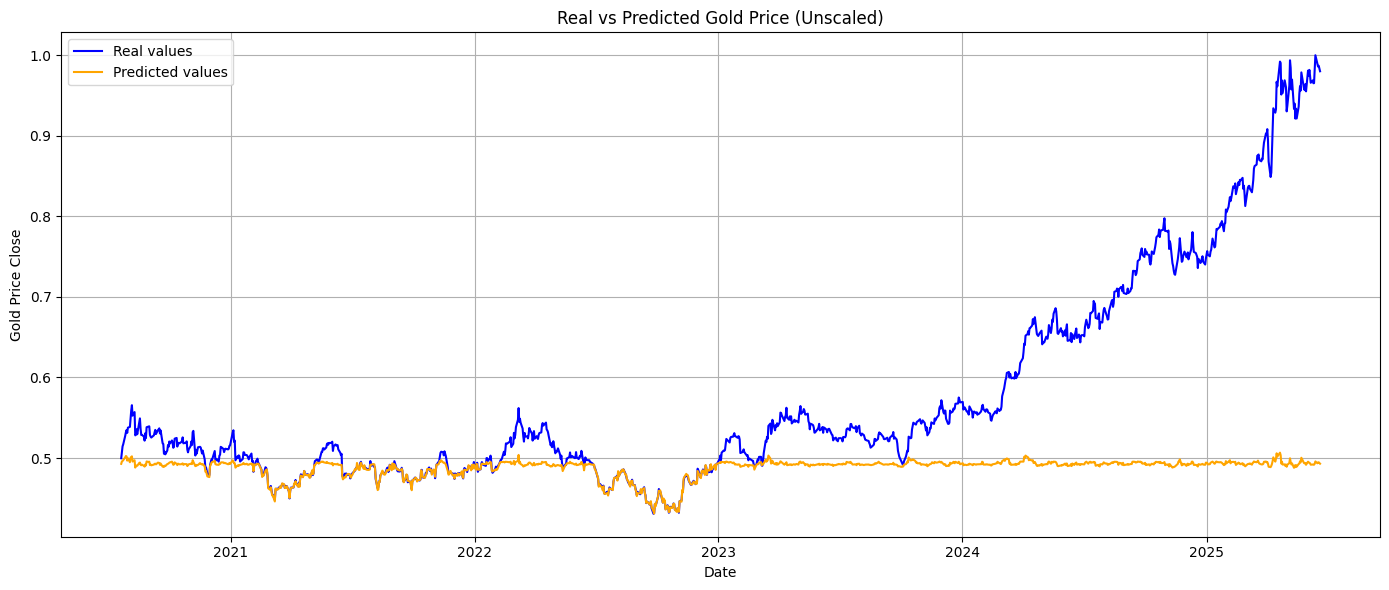

In [23]:
dates = df.loc[X_test.index]["Date"]

plt.figure(figsize=(14, 6))
plt.plot(dates, y_test.values, label="Real values", color="blue")
plt.plot(dates, y_pred, label="Predicted values", color="orange")
plt.xlabel("Date")
plt.ylabel("Gold Price Close")
plt.title("Real vs Predicted Gold Price (Unscaled)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
path = r'../models/model4.pkl'

joblib.dump(xgb, path)

['../models/model4.pkl']